In [1]:
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image
from matplotlib.pyplot import imshow

%matplotlib inline

/home/danny/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
csv_files_train = "../data/train.csv"
csv_files_eval = "../data/valid.csv"
output_model_dir = "./estimator"

train_batch_size=64
eval_batch_size=64
# train_batch_size=10
# eval_batch_size=10
input_shape=(129, 369) #iam shape
# input_shape=(117, 1669) # bentham shape1
# input_shape=(1833, 181) # bentham shape2
# alphabet=" !\"#&'()*+,-./0123456789:;<=>?ABCDEFGHIJKLMNOPQRSTUVWXY[]_abcdefghijklmnopqrstuvwxyz|"
alphabet="abcdefghijklmnopqrstuvwxyz"
alphabet_decoding='same'
alphabet_codes = list(range(len(alphabet)))
n_classes = len(alphabet)
csv_delimiter='\t'

## Read in data

In [3]:
# read in predictions
data = pickle.load(open(output_model_dir+"/preds2.pkl", "rb"))
labls, accs, losses, cers, preddicts, scps, pcs = data
# read in csv
imfiles = pd.read_csv(csv_files_train, sep="\t")

In [4]:
def getImg(ind):
    return Image.open(imfiles.path.iloc[ind])

def getLab1(ind):
    return imfiles.transcription.iloc[ind]
    
def getLab2(batch, b_ind):
    l1 = labls[batch]
    if len(l1) > 0:
        return l1[b_ind]
    else:
        return ""

def getPred(batch, b_ind):
    p1 = preddicts[batch]["words"]
    if len(p1) > 0:
        return p1[b_ind]
    else:
        return ""

def getIt(batch, b_ind):
    ind = batch*train_batch_size+b_ind
#     batch = ind // train_batch_size
#     b_ind = ind % train_batch_size
    
    img = getImg(ind)
    tran = getLab1(ind)
    lab = getLab2(batch, b_ind)
    pred = getPred(batch, b_ind)
    
    if lab == "" and pred == "" and tran != "":
        print("No prediction from machine")
        return "", "", ""
    else:
        return img, lab, pred
    
def showIt(batch, b_ind):
    img, lab, pred = getIt(batch, b_ind)
    print("Label:\t\t{0}\nPrediction:\t{1}".format(str(lab, "utf-8"), str(pred, "utf-8")))
    imshow(np.asarray(img), cmap="gray")

In [5]:
def getItMod(batch, b_ind):
    ind = (batch+1)*train_batch_size+b_ind
    
    img = getImg(ind)
    tran = getLab1(ind)
    lab = getLab2(batch, b_ind)
    pred = getPred(batch, b_ind)
    
    if lab == "" and pred == "" and tran != "":
        print("No prediction from machine")
        return "", "", ""
    else:
        return img, lab, pred
    
def showItMod(batch, b_ind):
    img, lab, pred = getItMod(batch, b_ind)
    print("Label: {0}\nPrediction: {1}".format(str(lab, "utf-8"), str(pred, "utf-8")))
    imshow(np.asarray(img), cmap="gray")

# Examples of transcriptions

# Successes

Label:		that
Prediction:	that


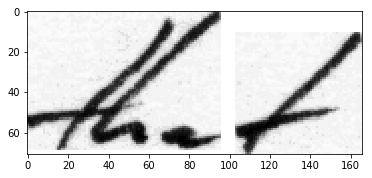

In [6]:
showIt(1, 22)

Label:		violently
Prediction:	violently


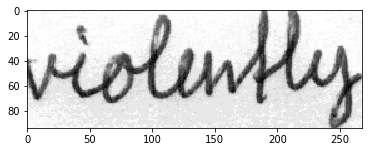

In [7]:
showIt(5, 9)

Label:		burdens
Prediction:	burdens


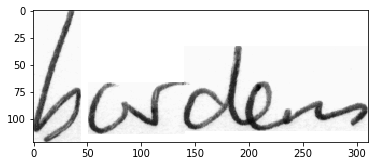

In [8]:
showIt(28, 23)

# Slightly off

Label:		meeting
Prediction:	mreeting


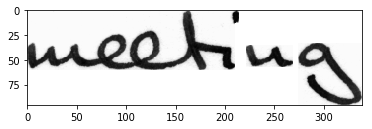

In [9]:
showIt(0, 12)

Label: considered
Prediction: considared


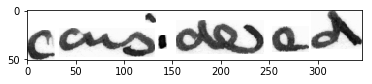

In [10]:
showItMod(29, 61)

#### Failures

Label:		discuss
Prediction:	disaauss


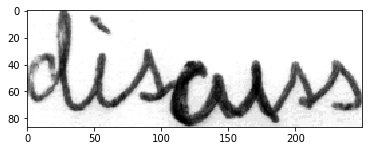

In [11]:
showIt(5, 2)

Label:		mention
Prediction:	meenaion


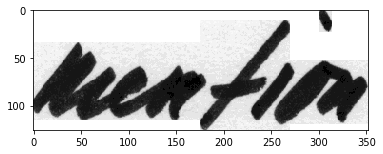

In [12]:
showIt(20, 2)

Label:		administration
Prediction:	adissmishetion


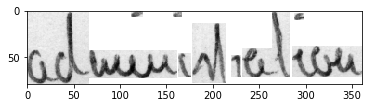

In [13]:
showIt(25, 0)